In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [56]:
NODES = 6
GOAL = 4

ALPHA = 0.02
GAMMA = 0.85
EXPLORE_PROB = 1.0

In [57]:
def get_actions(current):
    actions = []
    for rx in xrange(NODES):
        if (current, rx) in R:
            actions.append(rx)
    return actions

get_actions(0)

[1, 2, 5]

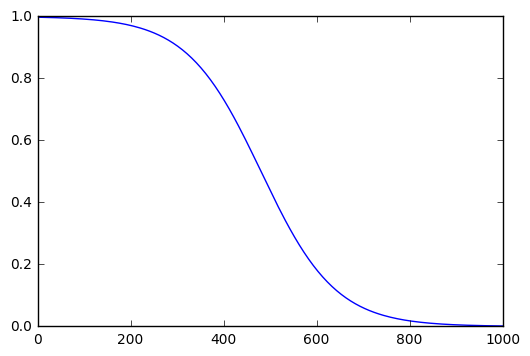

In [58]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def decay(t, total_iter=100, initial_value=None):
    z = ((t) / (0.08 * total_iter))
    return sigmoid(-1 * z + 6)

val = []
N = 1000
for ix in np.linspace(-1, N, 200):
    val.append(decay(ix, N, 1.0))
    
plt.plot(np.linspace(0, N, 200), val)



In [59]:
R = {
(0, 1): 0,
(0, 2): 0,
(0, 5): -4,
(1, 0): -1,
(1, 2): 5,
(1, 3): 2,
(1, 5): 0,
(2, 0): -5,
(2, 1): 0,
(2, 3): 10,
(2, 5): 8,
(3, 0): 5,
(3, 1): -3,
(3, 2): 4,
(3, 4): 50,
(3, 5): 2,
(4, 0): -10,
(4, 1): -5,
(4, 2): -20,
(4, 3): 0,
(4, 4): 100,
(4, 5): -50,
(5, 0): -15,
(5, 1): 2,
(5, 2): -7,
(5, 3): 0,
(5, 4): 70,
}

Q = {}

In [66]:
R = {
(0, 1): 0,
(0, 2): 0,
(0, 5): -4,
(1, 0): -1,
(1, 2): 0,
(1, 3): 0,
(1, 5): 0,
(2, 0): 0,
(2, 1): 0,
(2, 3): 0,
(2, 5): 0,
(3, 0): 0,
(3, 1): 0,
(3, 2): 0,
(3, 4): 50,
(3, 5): 0,
(4, 0): -10,
(4, 1): -5,
(4, 2): -20,
(4, 3): 0,
(4, 4): 100,
(4, 5): -50,
(5, 0): -15,
(5, 1): 0,
(5, 2): -7,
(5, 3): 0,
(5, 4): 70,
}

Q = {}

In [67]:
N_ep = 5000
EXPLORE = True
display_path = False
all_rewards = []
for ep in range(N_ep):
    pos = 0
    rew = 0
    steps = 0
    if display_path:
        print pos,
    while (not pos == GOAL) and steps < 4:
    # for kx in range(20):
        # print pos
        steps += 1
        p_act = get_actions(pos)
        
        best = []
        q_best = None
        
        for ac in p_act:
            rq = Q.setdefault((pos, ac), 0)
            if rq > q_best:
                q_best = rq
                best = [ac]
            elif rq == q_best:
                best.append(ac)
        
        # define exploration
        explore_prob = decay(ep, N_ep, EXPLORE_PROB)
        
        if np.random.random() < explore_prob and EXPLORE:
            nxt_pos = random.choice(p_act)
        else:
            nxt_pos = random.choice(best)
        if display_path:
            print nxt_pos,
        
        nxt_p_ac = get_actions(nxt_pos)
        
        nq_best = None
        
        for ac in nxt_p_ac:
            rq = Q.setdefault((nxt_pos, ac), 0)
            nq_best = max(nq_best, rq)
        
        Q[(pos, nxt_pos)] = (1- ALPHA)*Q[(pos, nxt_pos)] + ALPHA*(R[(pos, nxt_pos)] + GAMMA*nq_best)
        rew += R[(pos, nxt_pos)]
        pos = nxt_pos
    if display_path:
        print "\nEpisode:", ep, "| Reward:", rew
    all_rewards.append(rew)

In [68]:
for ax in range(NODES):
    for bx in range(NODES):
        if (ax, bx) in Q:
            print (ax, bx), Q[(ax, bx)]

(0, 1) 50.5377402407
(0, 2) 50.5349527857
(0, 5) 55.5
(1, 0) 45.4160994061
(1, 2) 48.8801916973
(1, 3) 44.5533332463
(1, 5) 59.4956682189
(2, 0) 46.4006073513
(2, 1) 49.0945896221
(2, 3) 44.3593764666
(2, 5) 59.494539845
(3, 0) 42.3357470224
(3, 1) 39.8408997662
(3, 2) 39.7445659893
(3, 4) 48.105065222
(3, 5) 58.6819211578
(4, 0) 0
(4, 1) 0
(4, 2) 0
(4, 3) 0
(4, 4) 0
(4, 5) 0
(5, 0) 32.0641474398
(5, 1) 50.2778144484
(5, 2) 43.2724991076
(5, 3) 48.1528697503
(5, 4) 70.0


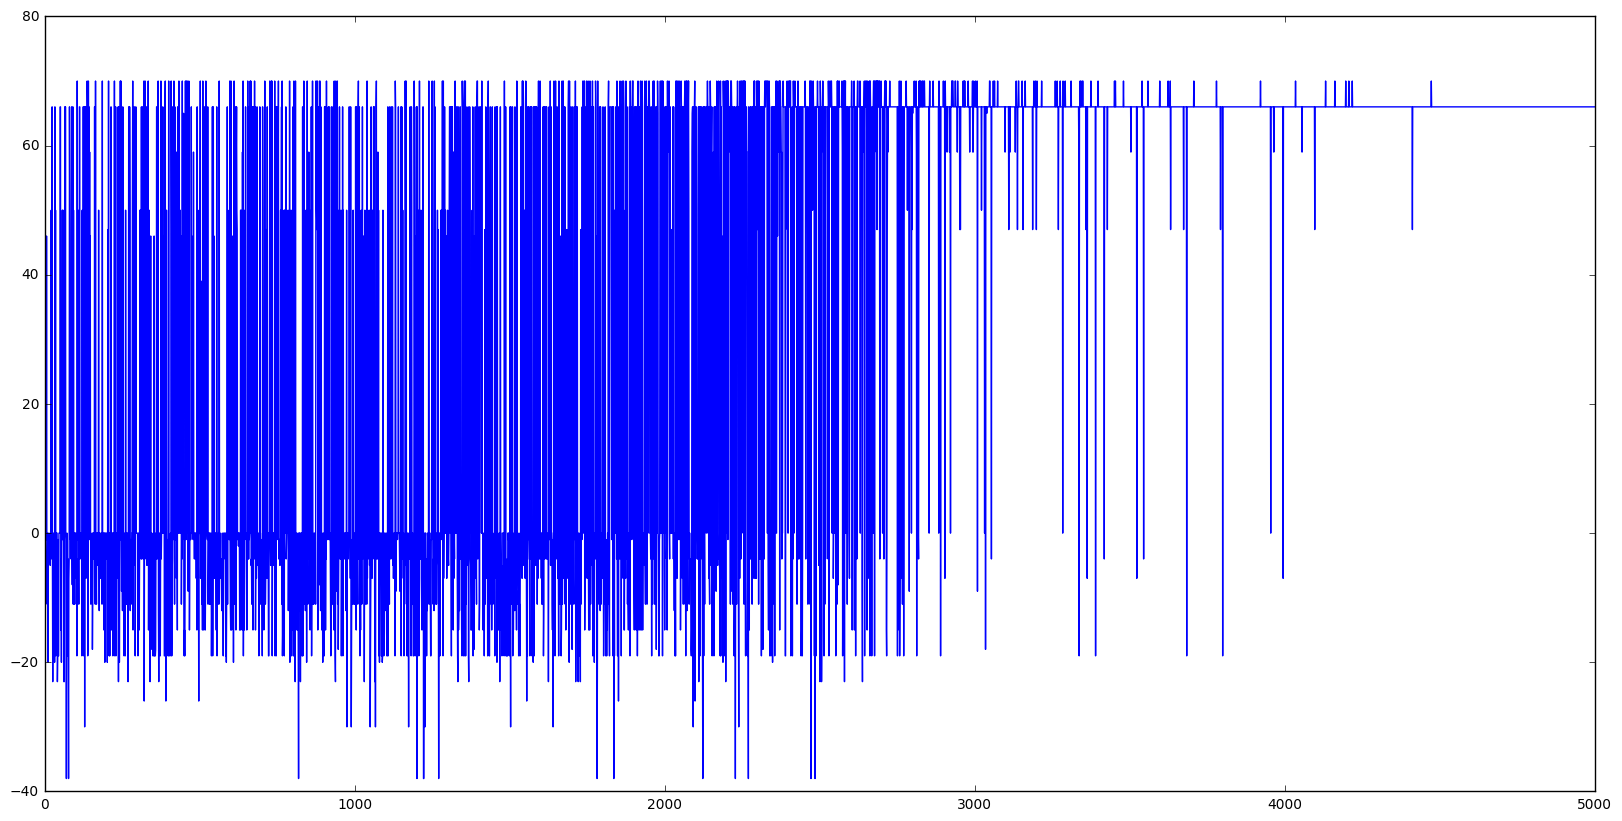

In [69]:
plt.figure(0, figsize=(20, 10))

plt.plot(all_rewards)
plt.show()